# Projeto 2 - NLP

## Análise de sentimento de Tweets

-----

Nome: Daniel Vaz Andrade

Turma: 735 DEGREE

### 1) Primeiro passo 

### Importação das Bibliotecas

Atenção: fiz a divisão das importações em blocos para facilitar a execução e identificação daquelas que estão instaladas no computador.

### 1.1) Bibliotecas de manipulação de dados e pre processamento

In [1]:
%%time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
from wordcloud import WordCloud
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec,doc2vec
from gensim.models.doc2vec import TaggedDocument
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 


# Configuração para os gráficos (crédito ao Prof. André!!)
sns.set(rc={'axes.labelsize': 10.0,'axes.titlecolor': 'black','axes.titleweight': 'bold',
                    'axes.labelweight': 'bold','axes.titlesize': 14.0,'figure.figsize': [10,7],
                    'figure.titlesize': 'xx-large','figure.titleweight': 'bold',})

Wall time: 13 s


### 1.2) Avaliação de modelos

In [2]:
%%time

from sklearn.model_selection import train_test_split,KFold,cross_validate,cross_val_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,classification_report

Wall time: 167 ms


### 1.3) Modelos de classificação

In [3]:
%%time

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

Wall time: 1.59 s


### 1.4) Otimização de hiperparâmetros

In [4]:
%%time

# Mais uma vez crédito ao Prof. André pela indicação da biblioteca
import optuna
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice
from optuna.visualization import plot_contour
from optuna.visualization import plot_optimization_history

Wall time: 708 ms


### 2) Segundo passo

### Análise e tratamento dos dados

In [5]:
%%time

#Importando os arquivos em variáveis
df_train = pd.read_csv('Train3Classes.csv')
df_sub = pd.read_csv('Subm3Classes.csv')

display(df_train,df_sub)

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)
...,...,...,...,...,...
94995,1041831666883321856,Cuba e defensor de direitos humanos se unem co...,Mon Sep 17 23:30:00 +0000 2018,2,jornaloglobo
94996,1032352892194369536,#Oportunidade ➡️ Venha fazer parte da nossa eq...,Wed Aug 22 19:44:44 +0000 2018,2,#oportunidade
94997,1046785538542440448,@96syoo EU SEI 😭😭 é por isso que significa mui...,Mon Oct 01 15:34:55 +0000 2018,0,:(
94998,1045457469110177792,@louistsexhes N te conheço mas posta :D,Thu Sep 27 23:37:38 +0000 2018,1,:)


,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)
...,...,...,...,...
4995,1049243861732794369,"Não é nada demais , apenas a verdade :) — Oh.....",Mon Oct 08 10:23:25 +0000 2018,:)
4996,1039334757690163201,Veja o que é #FATO ou #FAKE na entrevista de A...,Tue Sep 11 02:08:10 +0000 2018,#fato
4997,1049286902577356801,"@nattvieiira de quem???? queria ver, eu sai po...",Mon Oct 08 13:14:27 +0000 2018,:(
4998,1045349300744671232,ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃO...,Thu Sep 27 16:27:49 +0000 2018,:)


Wall time: 480 ms


Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

In [6]:
%%time

#Verificando as variáveis de cada dataset
df_train.info(), df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
Wall time: 49 ms


(None, None)

#### Não temos dados perdidos. Mas ainda precisamos verificar por exemplo se existem dados duplicados.

In [7]:
%%time

#Criando um filtro para pegar os dados duplicados
df_train = df_train.drop_duplicates()
df_sub = df_sub.drop_duplicates()

df_train.info(), df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   tweet_text  5000 non-null   object
 2   tweet_date  5000 non-null   object
 3   query_used  5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 195.3+ KB
Wall time: 189 ms


(None, None)

Como o volume de dados segue inalterado, significa que não temos dados duplicados, pois o comando utilizado acima faria a deleção caso houvesse.

#### Vamos verificar quantos usuários estão nessa base com uma contagem dos ids com 'nunique'

In [8]:
%%time
print('==== Contagem de IDs únicos por dataframe ====')
print("df_train: ", df_train['id'].nunique())
print("df_sub: ", df_sub['id'].nunique())
print('=============== FINALIZADA ===================')

==== Contagem de IDs únicos por dataframe ====
df_train:  94987
df_sub:  5000
=============== FINALIZADA ===================
Wall time: 14 ms


#### Feita a análise, vamos agora realizar alguns tratamentos nos dados

In [9]:
%%time
#Remover a coluna ID pois ela não acrescentará nenhuma informação relevante ao projeto

df_train_final = df_train.drop(columns=['id'])
df_sub_final = df_sub.drop(columns=['id'])

#Renomeando as colunas

df_train_final.columns = ['text','data','sentiment','query']
df_sub_final.columns = ['text','data','query']

Wall time: 11 ms


#### Vamos olhar para as hashtags mais usadas

In [10]:
%%time
df_train_final['query'].value_counts()

Wall time: 6 ms


:(               31696
:)               31678
folha             5004
estadao           3880
#fato             3471
g1                3439
exame             3417
#trabalho         3030
#oportunidade     2455
jornaloglobo      2374
veja              2141
#noticia          1114
#novidade          920
#curiosidade       381
Name: query, dtype: int64

### 3) Terceiro passo

### Pre Processamento

Wall time: 84 ms


[Text(0, 0, 'Negativo'), Text(1, 0, 'Positivo'), Text(2, 0, 'Neutro')]

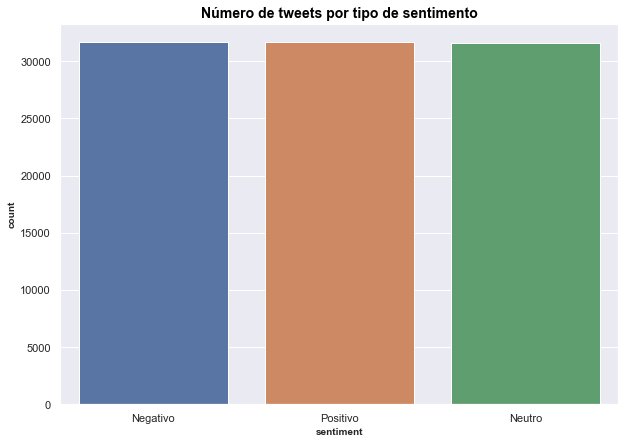

In [11]:
%%time

#Fazendo um counplot do sentimento (0 para negativo, 1 para positivo e 2 para neutro)
graph = sns.countplot(data=df_train_final,x='sentiment')
graph.set_title('Quantidade de tweets por sentimento')
graph.set_xticklabels(labels=['Negativo','Positivo','Neutro']);

### Limpeza dos tweets

#### Vamos criar uma função para realizar a limpeza nos datasets

In [12]:
%%time

import nltk
nltk.download('stopwords')

Wall time: 145 ms


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
%%time
# Nesse ponto pode ser necessário realizar o download da pipeline treinada. Execute "!python -m spacy download pt_core_news_lg"

nlp = spacy.load('pt_core_news_lg')
stopwords_pt = stopwords.words('portuguese')

def cleaning(row,nlp=nlp,stopwords=stopwords_pt):
    '''Função recebe cada linha do dataset e realiza o pre processamento retornando uma lista de tokens'''
    
    #Colocando todas as palavras em minúsculo
    row = row.lower()
    #Removendo menções, links, carinhas, digitos, acentuação, caracteres_especiais
    row = re.sub(r'@[a-zA-Z0-9_]{1,50}','',row)
    row = re.sub(r'(https:\/\/.+)','',row)
    row = row.replace(':d','')
    row = row.replace(':p','')
    row = re.sub(r'\d+','',row)
    #row = unidecode(row)
    row = re.sub(r'[^a-zA-Z0-9]',' ',row)
    row = re.sub(r'(\w)\1(\1+)',r'\1',row)
    #Removendo os espaços do inicio e final de cada frase
    row = row.strip()
    #Tokenizando
    doc = nlp(row)
    #Removendo as stopwords:
    row = [word for word in doc if word.text not in stopwords_pt]
    #Removendo palavras que não tem lemma
    row = [word.lemma_.strip() for word in row]
    #Removendo elementos vazio 
    row = [word for word in row if word != '']
    return row

Wall time: 3.13 s


In [14]:
%%time
display(df_train_final.columns, df_sub_final.columns)

Index(['text', 'data', 'sentiment', 'query'], dtype='object')

Index(['text', 'data', 'query'], dtype='object')

Wall time: 5 ms


In [15]:
%%time

print('Criando cópias dos datasets para fazer a limpeza...em andamento')
df_train_clean = df_train_final.copy()
df_sub_clean = df_sub_final.copy()
print('Cópias criadas!')

Criando cópias dos datasets para fazer a limpeza...em andamento
Cópias criadas!
Wall time: 9 ms


In [16]:
%%time

#Aplicando a função de limpeza linha por linha e juntar essa lista de tokens
df_train_clean['tweet_clean'] = df_train_clean['text'].apply(lambda x: cleaning(x))
df_train_clean['tweet_joined'] = df_train_clean['tweet_clean'].apply(lambda x: ' '.join(x))

df_sub_clean['tweet_clean'] = df_sub_clean['text'].apply(lambda x: cleaning(x))
df_sub_clean['tweet_joined'] = df_sub_clean['tweet_clean'].apply(lambda x: ' '.join(x))

Wall time: 20min 48s


Datasets preparados.

### Passo 4: Modelagem

## Baseline

In [17]:
%%time

#Train_test_split
def baseline_transform(models,X=df_train_clean['tweet_joined'],y=df_train_clean['sentiment'],verbose=False):

    #Dicionário de métricas de avaliação para cada modelo
    models_dict = {}
    #Lista de métricas de avaliação que usaremos
    metrics = ['recall_weighted','precision_weighted','f1_weighted','accuracy','roc_auc_ovr']
    
    if verbose:
        print("===== Fitando os modelos =====")
    #Loop para cada modelo
    for model in models:
        if verbose:
            print(f"Fit do modelo {model} em andamento...")
        #Criando o pipeline
        pipe = Pipeline(steps=[('vect',CountVectorizer()),
                                (model,models[model])])
        #Fazendo a validação cruzada
        scores = cross_validate(pipe,X,y,cv=5,scoring=metrics,return_train_score=True,n_jobs=-1)

        # Dicionário com as métricas de cada modelo                    
        models_dict[model] = {'recall_test': scores['test_recall_weighted'].mean(),
                                     'recall_train': scores['train_recall_weighted'].mean(),
                                     'precision_test': scores['test_precision_weighted'].mean(),
                                     'precision_train': scores['train_precision_weighted'].mean(),
                                     'f1_test': scores['test_f1_weighted'].mean(),
                                     'f1_train': scores['train_f1_weighted'].mean(),
                                     'accuracy_test': scores['test_accuracy'].mean(),
                                     'accuracy_train': scores['train_accuracy'].mean(),
                                     'roc_auc_test': scores['test_roc_auc_ovr'].mean(),
                                     'roc_auc_train': scores['train_roc_auc_ovr'].mean(),
                                    }
        if verbose:
            print(f"Fit do modelo {model} finalizado")                    
    tabela = pd.DataFrame(models_dict)
    return tabela

Wall time: 0 ns


In [ ]:
%%time

#Dicionário de modelos
models = {  'Random Forest': RandomForestClassifier(random_state=43,n_jobs=-1),
            'Gradiente Boost': GradientBoostingClassifier(random_state=43),
            'Regressão Logística': LogisticRegression(random_state=43),
            'XGBoost': XGBClassifier(random_state=43,eval_metric='logloss',use_label_encoder=False,n_jobs=-1),
            'Catboost': CatBoostClassifier(random_state=43,verbose=False)
         }

baseline_table = baseline_transform(models,verbose=True)

===== Fitando os modelos =====
Fit do modelo Random Forest em andamento...
Fit do modelo Random Forest finalizado
Fit do modelo Gradiente Boost em andamento...
Fit do modelo Gradiente Boost finalizado
Fit do modelo Regressão Logística em andamento...
Fit do modelo Regressão Logística finalizado
Fit do modelo XGBoost em andamento...
Fit do modelo XGBoost finalizado
Fit do modelo Catboost em andamento...


In [ ]:
baseline_table

**Análise dos resultados**

1) Vamos desconsiderar o Random Forest devido ao overfitting no treino (roc_auc_train = 0.99).

2) A métrica de escolha será o *precision* e o modelo será Regressão Logística (0.89) pois nosso objetivo é classificar corretamente os sentimentos nos tweets.



Vamos testar diferentes transformações de dados:

1) Word2Vec

2) Doc2Vec

3) Bag of words

4) TF-IDF


## Transformações

In [ ]:
%%time

def word2vec(x,model):
    '''Função para criar as amostras de teste e treino do word2vec'''
    X_w2v_sn = [] #lista para somar os vetores
    for phrase in x:
        vecs = []
        for word in phrase:
            if word in model.wv.index_to_key:
                vecs.append(model.wv.get_vector(word))
        if vecs:
            soma_normalizada = np.sum(vecs, axis=0) / np.linalg.norm(np.sum(vecs, axis=0))
            X_w2v_sn.append(soma_normalizada)
        else:
            X_w2v_sn.append(np.zeros(model.vector_size))
    return np.array(X_w2v_sn)

print('Criando o X e o Y que serão usados nas transformações de bag of words e TF-IDF')
X = df_train_clean['tweet_joined'].copy()
y = df_train_clean['sentiment'].copy()
print('Criado com sucesso!')

print('Iterando o treino para o bag of words e para o TF-IDF ...em andamento')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Finalizado!')

print('Iterando o treino para o Word2Vec ...em andamento')
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Finalizado!')

print('Criando o X e o Y que serão usados nas transformações de word2vec...em andamento')
X_ = df_train_clean['tweet_clean'].copy()
y_ = df_train_clean['sentiment'].copy()
print('Finalizado!')

print('Criando a Bag of words...em andamento')
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
print('Criado com sucesso')

print('Criando o TF-IDF...em andamento')
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfid = tfidf.transform(X_test)
print('Criado com sucesso!')

print('Criando o Word2Vec skipgram...em andamento')
w2v_s = Word2Vec(sentences= X_train_, min_count=5, workers=-1,sg=1)
X_train_w2v_sn_skip = word2vec(X_train_,model=w2v_s)
X_test_w2v_sn_skip = word2vec(X_test_,model=w2v_s)
print('Criado com sucesso!')

print('Criando Word2Vec cbow...em andamento')
w2v_c = Word2Vec(sentences=X_train_, vector_size=500, min_count=5, workers=-1,sg=0)
X_train_w2v_sn_cbow = word2vec(X_train_,model=w2v_c)
X_test_w2v_sn_cbow = word2vec(X_test_,model=w2v_c)
print('Criado com sucesso')

In [ ]:
def test_transformers(transformers_dict,model):
    '''Testa as transformações no dataset usando a regressão logística como modelo padrão'''
    
    #Dicionário de métricas para cada transformador
    transformers_metrics = {}
    
    #Lista de métricas a serem avaliadas
    metrics = ['recall_weighted','precision_weighted','f1_weighted','accuracy','roc_auc_ovr']

    #Loop para testar todas as transformações
    for transformer,train_test_sets in transformers_dict.items():
        print(transformer.upper())
        print(f'Treinando {transformer}')
        
        #Fazendo a validação cruzada (usando somente a base de treino)
        scores = cross_validate(model,train_test_sets['X_train'],train_test_sets['y_train'],cv=5,scoring=metrics,n_jobs=-1) #aqui está ocorrendo target leadk da base de validação para a base de treino e precisará ser corrigido em uma revisão do projeto
        print(f'Treinamento com {transformer} finalizado')


        print(f'Testando {transformer}')
        #Fitando o modelo agora com toda a base de treino
        model.fit(train_test_sets['X_train'], train_test_sets['y_train'])
        #Predizendo com a base de teste 
        y_pred_test = model.predict(train_test_sets['X_test'])
        #Predizendo a probabilidade de cada label
        y_pred_test_prob = model.predict_proba(train_test_sets['X_test'])

        #Calculando as métricas de avaliação do teste
        accuracy_test = accuracy_score(train_test_sets['y_test'], y_pred_test)
        precision_test = precision_score(train_test_sets['y_test'], y_pred_test, average='weighted')
        recall_test = recall_score(train_test_sets['y_test'], y_pred_test, average='weighted')
        f1_test = f1_score(train_test_sets['y_test'], y_pred_test, average='weighted')
        auc_test = roc_auc_score(train_test_sets['y_test'], y_pred_test_prob,multi_class='ovr')
                
        # Dicionário com as métricas de cada modelo                    
        transformers_metrics[transformer] = {'recall_test': recall_test,
                                     'recall_train': scores['test_recall_weighted'].mean(),
                                     'precision_test': precision_test,
                                     'precision_train': scores['test_precision_weighted'].mean(),
                                     'f1_test': f1_test,
                                     'f1_train': scores['test_f1_weighted'].mean(),
                                     'accuracy_test': accuracy_test,
                                     'accuracy_train': scores['test_accuracy'].mean(),
                                     'roc_auc_test': auc_test,
                                     'roc_auc_train': scores['test_roc_auc_ovr'].mean(),
                                    }
        print(f'Teste com {transformer} finalizado')

        print('RESULTADO DA CLASSIFICAÇÃO' )   
        print(classification_report(train_test_sets['y_test'],y_pred_test))
    

        
    table = pd.DataFrame(transformers_metrics)
    return table

print('Criando dicionário de transformadores com suas bases')
transformers_train_test_sets = {'bag of words':{'X_train':X_train_cv,
                                                'X_test':X_test_cv,
                                                'y_train':y_train,
                                                'y_test':y_test},

                                        'TF-IDF':{'X_train':X_train_tfidf,
                                                'X_test':X_test_tfid,
                                                'y_train':y_train,
                                                'y_test':y_test},

                            'Word2Vec skipgram':{'X_train':X_train_w2v_sn_skip,
                                                'X_test':X_test_w2v_sn_skip,
                                                'y_train':y_train_,
                                                'y_test':y_test_},

                                'Word2Vec cbow':{'X_train':X_train_w2v_sn_cbow,
                                                'X_test':X_test_w2v_sn_cbow,
                                                'y_train':y_train_,
                                                'y_test':y_test_}}
print('Dicionário criado com sucesso!')

In [ ]:
# Iterando o modelo de Regressão Logística
modelo = LogisticRegression()
table = test_transformers(transformers_train_test_sets, modelo)

In [ ]:
#Visualizando a tabela criada
table

## Melhorar o preprocessamento

Melhorar o preprocessamento pode melhorar o modelo. Para atingir esse resultado, faremos a remoção de stop-words escritas incorretamente.

In [ ]:
#Palavras escritas de forma errada
wrong_words = ['pra','to','mt','eh','tbm','pro','ta','tava','nao','n','q','k','r','voce','voces','vc','ja','p','so']

#Adicionando as 'wrong_words' nas stopwords
stopwords_pt = stopwords_pt + wrong_words

def pre_process_update(row,nlp=nlp,stopwords=stopwords_pt):
    '''Função recebe cada linha do dataset, realiza o pre processamento e retorna tokens'''
    #Removendo menções
    row = re.sub(r'@[a-zA-Z0-9_]{1,50}','',row)
    #Removendo o links:
    row = re.sub(r'(https:\/\/.+)','',row)
    #Colocando todas as palavras em minúsculo
    row = row.lower()
    #Removendo todos os :d (sorriso) ou sorriso:p
    row = row.replace(':d','')
    row = row.replace(':p','')
    #Removendo os digitos
    row = re.sub(r'\d+','',row)
    #Removendo os caracteres especiais
    row = re.sub(r'[^a-zA-Z0-9]',' ',row)
    #Removendo caracteres repetidos 3 ou mais vezes
    row = re.sub(r'(\w)\1(\1+)',r'\1',row)
    #Removendo os espaços do inicio e final de cada frase
    row = row.strip()
    #Tokenizando
    doc = nlp(row)
    #Removendo as stopwords:
    row = [word for word in doc if word.text not in stopwords_pt]
    #Removendo palavras que não tem lemma
    row = [word.lemma_.strip() for word in row]
    #Removendo elementos vazio 
    row = [word for word in row if word != '']
    return row

In [ ]:
print('Criando cópias do dataset limpo...em andamento')
words_train_clean_update = df_train_clean.copy() #Treino
words_sub_clean_update = df_sub_clean.copy() #Teste
print('Criadas com sucesso!')

print('Aplicando a função de pre-processamento...em andamento')
words_train_clean_update['tweet_clean'] = words_train_clean_update['text'].apply(lambda x: pre_process_update(x))
words_sub_clean_update['tweet_clean'] = words_sub_clean_update['text'].apply(lambda x: pre_process_update(x))
print('Finalizado com sucesso!')

print('Juntando os tokens em uma string...em andamento')
words_train_clean_update['tweet_joined'] = words_train_clean_update['tweet_clean'].apply(lambda x: ' '.join(x))
words_sub_clean_update['tweet_joined'] = words_sub_clean_update['tweet_clean'].apply(lambda x: ' '.join(x))
print('Finalizado com sucesso!')

Vamos verificar se os resultados irão melhorar (update)

In [ ]:
table_after_preprocess_update = baseline_transform(models,words_train_clean_update['tweet_joined'],words_train_clean_update['sentiment'],verbose=True)

In [ ]:
table_after_preprocess_update

A melhoria do pre-processamento não otimizou os resultados.

In [ ]:
# Repetindo o mesmo processo de criação dos datasets para treinamento e teste com os transformadores
# porém após o novo pre processamento

print('Criando o X e o Y que usaremos nas transformações de bag of words e TF-IDF...em andamento')
X_up = words_train_clean_update['tweet_joined'].copy()
y_up = words_train_clean_update['sentiment'].copy()
print('Finalizado!')


print('Treino para o bag of words e para o TF-IDF...em andamento')
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size = 0.3, random_state = 42)

print('Criando o X e o Y que usaremos nas transformações de word2vec...')
X_up_ = words_train_clean_update['tweet_clean'].copy()
y_up_ = words_train_clean_update['sentiment'].copy()
print('Finalizado!')

#Fazendo as transformações em cada dataset de treino e teste cada transformação

print('Criando a Bag of words...em andamento')
cv = CountVectorizer()
X_train_cv_up = cv.fit_transform(X_train_up)
X_test_cv_up = cv.transform(X_test_up)
print("Bag of words criado!")

print('Criando TF-IDF...em andamento')
tfidf = TfidfVectorizer()
X_train_tfidf_up = tfidf.fit_transform(X_train_up)
X_test_tfid_up = tfidf.transform(X_test_up)
print('TF-IDF criado!')

print('Criando Word2Vec skipgram...em andamento')
w2v_s = Word2Vec(sentences=X_train_up_, vector_size=500, min_count=5, workers=-1,sg=1)
X_train_w2v_sn_skip_up = word2vec(X_train_up_,model=w2v_s)
X_test_w2v_sn_skip_up = word2vec(X_test_up_,model=w2v_s)
print('Word2Vec skipgram criado!')

print('Criando Word2Vec cbow...em andamento')
w2v_c = Word2Vec(sentences=X_train_up_, vector_size=500, min_count=5, workers=-1,sg=0)
X_train_w2v_sn_cbow_up = word2vec(X_train_up_,model=w2v_c)
X_test_w2v_sn_cbow_up = word2vec(X_test_up_,model=w2v_c)
print('Word2Vec cbow criado!')

In [ ]:
#Dicionário de transformadores com suas respectivas bases
transformers_train_test_sets_up = {'bag of words':{'X_train':X_train_cv_up,
                                                'X_test':X_test_cv_up,
                                                'y_train':y_train_up,
                                                'y_test':y_test_up},

                                        'TF-IDF':{'X_train':X_train_tfidf_up,
                                                'X_test':X_test_tfid_up,
                                                'y_train':y_train_up,
                                                'y_test':y_test_up},

                            'Word2Vec skipgram':{'X_train':X_train_w2v_sn_skip_up,
                                                'X_test':X_test_w2v_sn_skip_up,
                                                'y_train':y_train_up_,
                                                'y_test':y_test_up_},

                                'Word2Vec cbow':{'X_train':X_train_w2v_sn_cbow_up,
                                                'X_test':X_test_w2v_sn_cbow_up,
                                                'y_train':y_train_up_,
                                                 'y_test':y_test_up_}}


# Iterando a regressão logística
modelo_rl = LogisticRegression()
table_up = test_transformers(transformers_train_test_sets_up, modelo_rl)

In [ ]:
# Visualizando a tabela mais uma vez
table_up

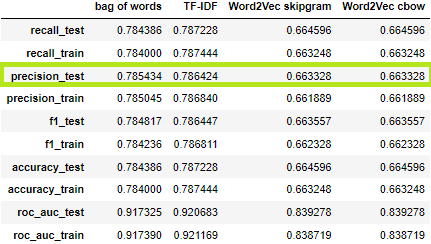

A escolha pela "precision" nos direciona ao TF-IDF.

## Otimizando os modelos

In [ ]:
# X_train
transformers_train_test_sets['TF-IDF']['X_train']

In [ ]:
# Y_train
transformers_train_test_sets['TF-IDF']['y_train']

Para otimização usaremos o **Optuna** com os seguintes hiperparâmetros de tunning: 

(você encontra a referência dos parâmetros abaixo no link https://optuna.org/)

- max_iter: número máximo de interações para o algorítmo convergir ao máximium likelyhood
- warm_start: com esse parâmetro o algorítmo usa as soluções anteriores para realizar as próximas soluções
- penalty: tipo de penalidade que usaremos, podendo ser nenhuma, l1(lasso),l2(ridge) e elasticnet
- tol: tolerancia do critério de parada, ou seja, a partir de quanto o modelo irá parar se não estiver havendo melhora
- C: inverso da força da regularização. Quanto maior, menor será a força da regularização
- l1_ratio: parâmetro para a penalização elasticnet. Se esse parâmetro for 0 ou 1 é equivalente a usar o l2 ou o l1,respectivamente.
- solver: tipo de solver utilizado. Lendo a documentação vemos que os métodos 'saga' e 'sag' são melhores para data sets grandes. Considerando o tempo que o optuna está levando para fazer cada trial, vamos considerar nosso dataset grande e usaremos somente o método saga para conseguir usarar todas as penalizações

**Créditos do Optuna (atendendo aos criadores):**

>Takuya Akiba, Shotaro Sano, Toshihiko Yanase, Takeru Ohta,and Masanori Koyama. 2019.

>Optuna: A Next-generation Hyperparameter Optimization Framework. In KDD.

In [ ]:
# Função otimizadora

def optimize(trial):
    #Dicionário com o grid de parâmetros
    params = dict(
        penalty = trial.suggest_categorical('penalty',['none','l1','l2','elasticnet']),
        tol = trial.suggest_float('tol',1e-4,1e-2,log=True),
        C = trial.suggest_float('C',1,3.5),
        max_iter = trial.suggest_float('max_iter',100,500),
        warm_start = trial.suggest_categorical('warm_start',[True,False]),
        l1_ratio = trial.suggest_float('l1_ratio',0,1),

    )
    #Instanciação da Regressão Logística e seus parâmetros
    model = LogisticRegression(**params,random_state=43,n_jobs=-1,solver='saga',multi_class='multinomial')
    # Será feito um cross validation de 5 folds para melhorar a "precision"
        
    #Validação cruzada (vamos usar a '.mean' dos 5 ciclos)
    return cross_validate(model,
                        transformers_train_test_sets['TF-IDF']['X_train'], #dataset de treino com a transformação aplicada
                        transformers_train_test_sets['TF-IDF']['y_train'], #dataset de treino com a transformação aplicada
                        scoring=['precision_weighted'],
                        cv = 5,
                        n_jobs=-1)['test_precision_weighted'].mean()

In [ ]:
%%time

print('Fazendo a otimização com a biblioteca Optuna!')
print('====================================================================================')
optuna_lg = optuna.create_study(direction="maximize",study_name ='Logistic Regression Study')
optuna_lg.optimize(optimize, n_trials=10)
reglog_params = optuna_lg.best_params
print('Finalizado com sucesso!')

In [ ]:
%%time

reglog_params

In [ ]:
%%time

plot_optimization_history(optuna_lg)

In [ ]:
%time

plot_param_importances(optuna_lg)

A penalidade foi o hiperparamentro que mais contribuiu com 73%.

In [ ]:
%%time

print('Utilizando os melhores hiperparâmetros')
reglog_paramns_final = {'penalty': 'l2',
 'tol': 0.00048231241598934056,
 'C': 1.1886572731680074,
 'max_iter': 426.1981043608994,
 'warm_start': True,}

model = LogisticRegression(**reglog_paramns_final,random_state=43,n_jobs=-1,solver='saga',multi_class='multinomial')
model.fit(transformers_train_test_sets['TF-IDF']['X_train'],transformers_train_test_sets['TF-IDF']['y_train'])
y_pred = model.predict(transformers_train_test_sets['TF-IDF']['X_test'])
y_pred_proba = model.predict_proba(transformers_train_test_sets['TF-IDF']['X_test'])

print(classification_report(transformers_train_test_sets['TF-IDF']['y_test'],y_pred))

print('Processo finalizado com sucesso!')

### 5) Resultados
#### Lembrando que 0 é negativo, 1 é positivo e 2 é neutro

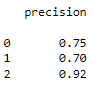

In [ ]:
%%time

tfid= TfidfVectorizer()
X_train_ful = tfid.fit_transform(df_train_clean['tweet_joined'])
X_test_full = tfid.transform(df_sub_clean['tweet_joined'])

#Fitando e gerando as predições
model = LogisticRegression(**reglog_paramns_final,random_state=43,n_jobs=-1,solver='saga',multi_class='multinomial')
model.fit(X_train_ful,df_train_clean['sentiment'])
predictions = model.predict(X_test_full)

#Gerando o arquivo cvs com as predições no formato especificado
arquivo = pd.DataFrame(data={'sentiment_predict':predictions},index = df_sub['id'])
arquivo.to_csv('Daniel_Andrade_735_projeto_2_submissao.csv')

In [ ]:
#Preview
arquivo.head(5)